In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [34]:
def find_plate(img, th_img):
    contours, hierarchy = cv.findContours(th_img, cv.RETR_EXTERNAL,
                                                cv.CHAIN_APPROX_SIMPLE)

    area = -1
    x_plate, y_plate, w_plate, h_plate = 0, 0, 0, 0
    plate_cnt = None

    for cnt in contours:
        x, y, w, h = cv.boundingRect(cnt)
        aspect = w / h
        if aspect > 3 and aspect < 7:
            count_area = cv.contourArea(cnt)
            if count_area > area:
                area = count_area
                x_plate, y_plate, w_plate, h_plate = x, y, w, h
                plate_cnt = cnt

    rect = cv.minAreaRect(plate_cnt)
    box = cv.boxPoints(rect)
    box = np.intp(box)

    angle = rect[2]
    if angle > 45:
        angle = angle - 90
    elif angle < -45:
        angle = 90 + angle
        
    if rect[1][0] < rect[1][1]:
        angle += 90

    (h, w) = img.shape
    M = cv.getRotationMatrix2D(rect[0], angle, 1.0)
    rotated = cv.warpAffine(img, M, (w, h), flags=cv.INTER_CUBIC)
    x, y, w, h = cv.boundingRect(cv.boxPoints(((rect[0]), (rect[1]), 0)))
    cropped = rotated[y:y+h, x:x+w]
    return cropped

In [46]:
def find_plate_2(img, th_img):
    contours, _ = cv.findContours(th_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    plate_cnt = None
    best_area = 0

    for cnt in contours:
        x, y, w, h = cv.boundingRect(cnt)
        aspect = w / h if h != 0 else 0
        area = cv.contourArea(cnt)
        if 2.5 < aspect < 8.0 and area > best_area:
            best_area = area
            plate_cnt = cnt

    if plate_cnt is None:
        return None

    rect = cv.minAreaRect(plate_cnt)
    (cx, cy), (w, h), angle = rect

    if w < h:
        angle += 90
        w, h = h, w

    if angle > 170:
        angle -= 180
    print(angle)

    M = cv.getRotationMatrix2D((cx, cy), angle, 1.0)
    rotated = cv.warpAffine(img, M, (img.shape[1], img.shape[0]), flags=cv.INTER_CUBIC)
    box = cv.boxPoints(((cx, cy), (w, h), 0))
    box = np.intp(box)
    x, y, w, h = cv.boundingRect(box)

    cropped = rotated[y:y+h, x:x+w]

    if cropped.shape[0] > cropped.shape[1]:
        cropped = cv.rotate(cropped, cv.ROTATE_90_CLOCKWISE)

    return cropped

4.763641834259033


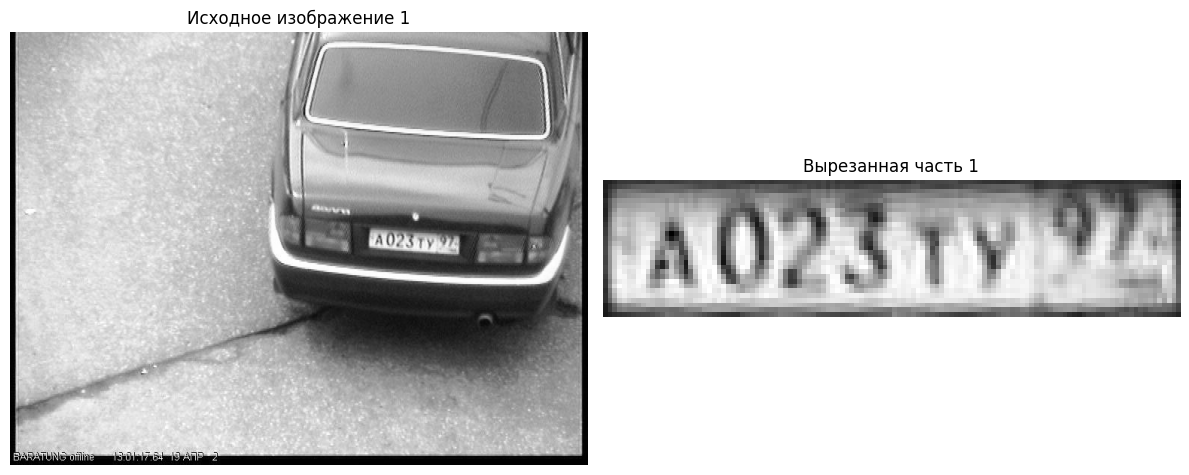

1.6602822542190552


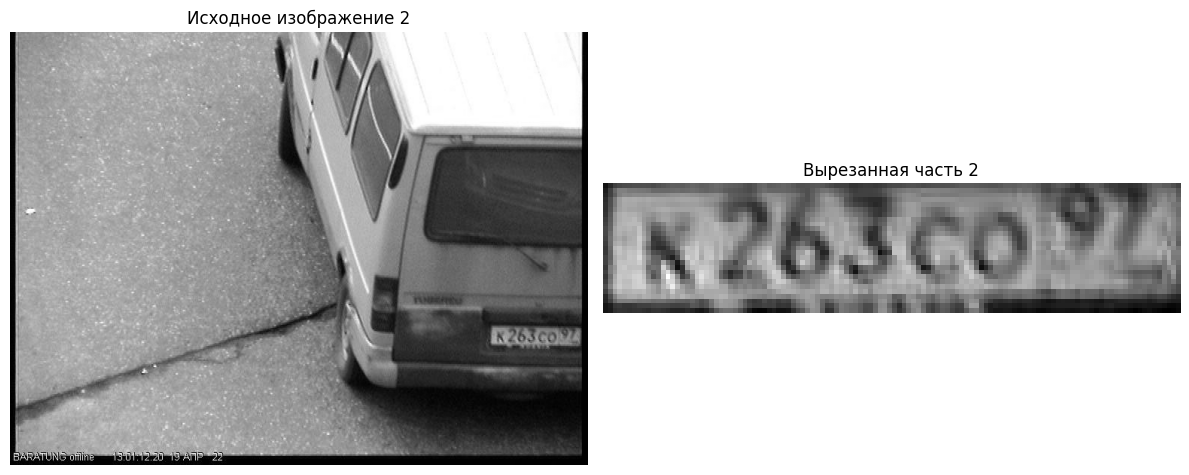

5.19442892074585


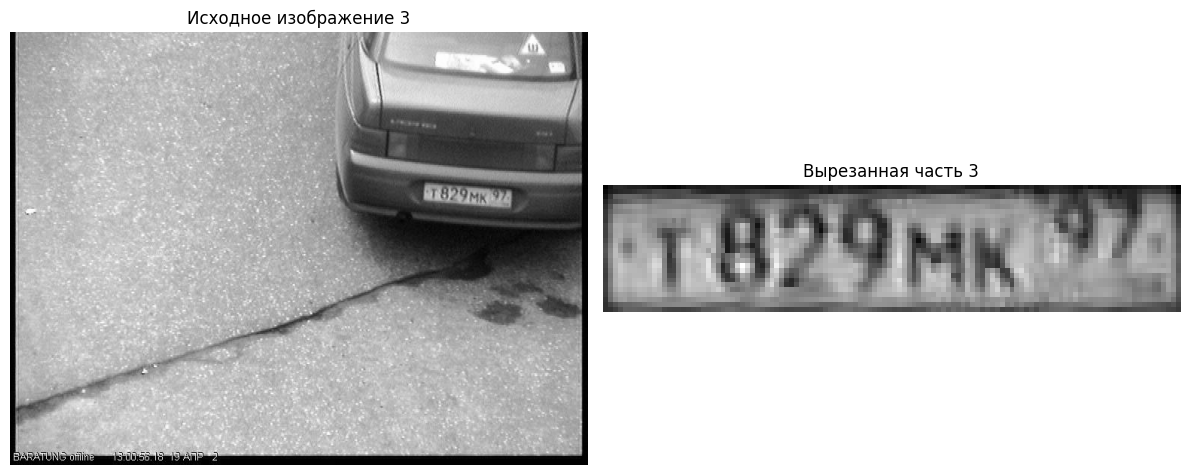

163.20162963867188


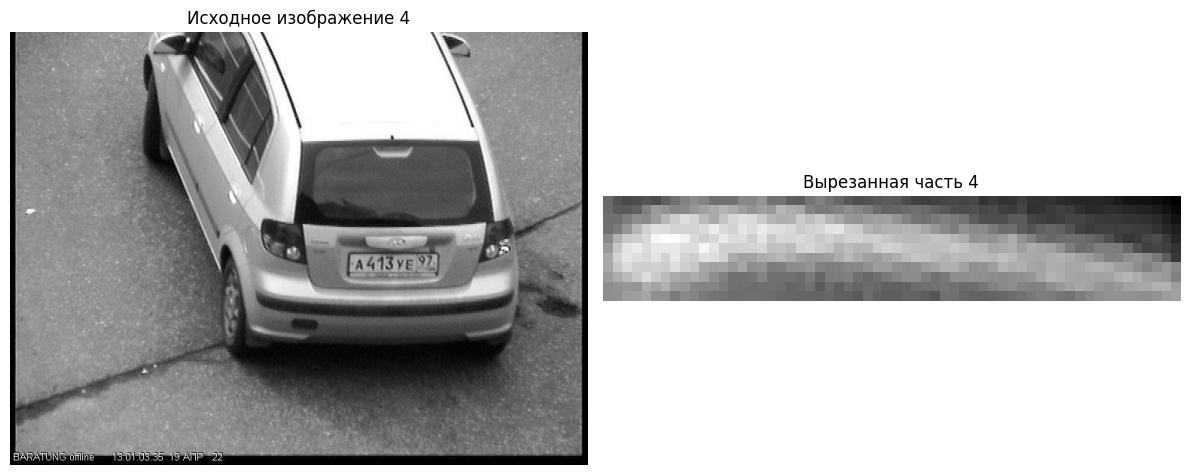

0.0


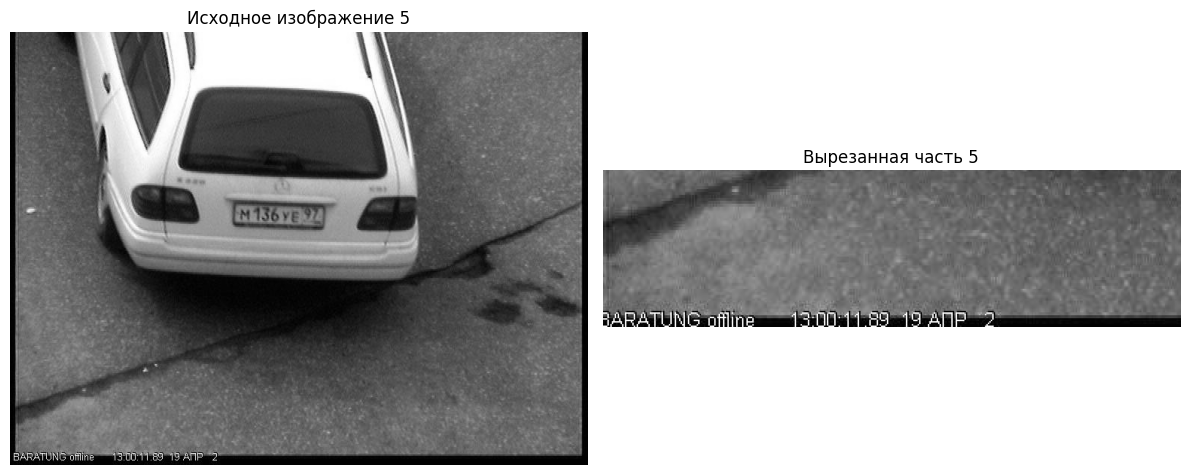

-2.4366531372070312


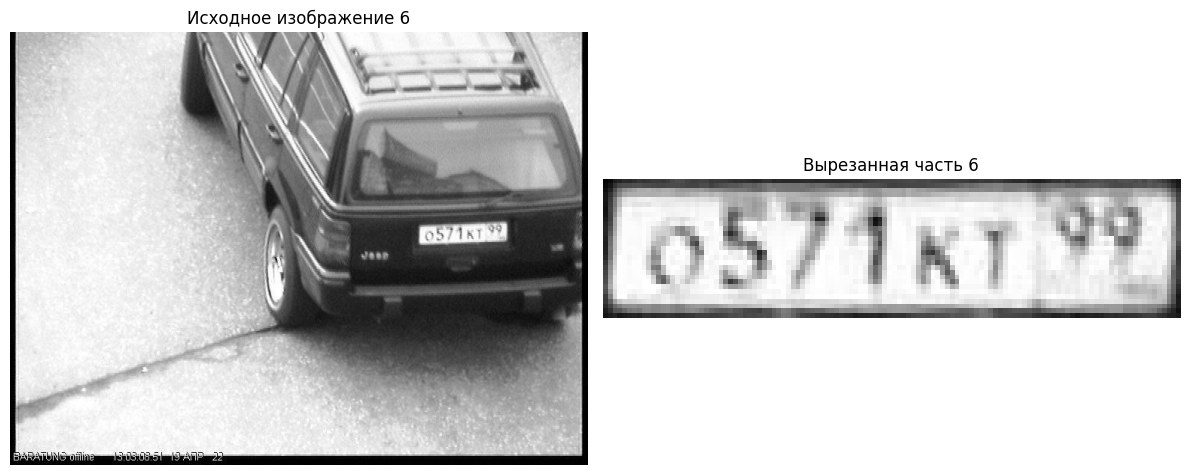

1.7357046604156494


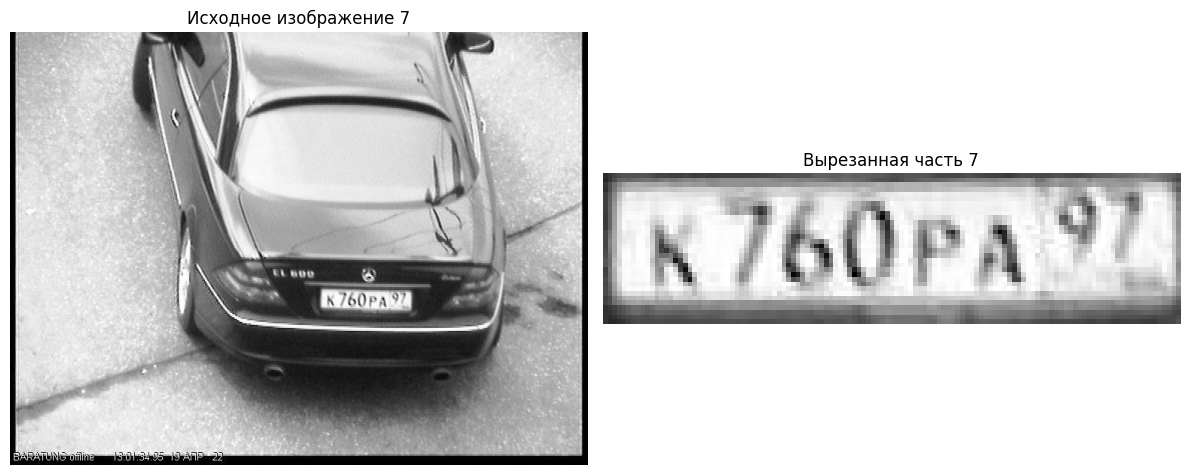

0.0


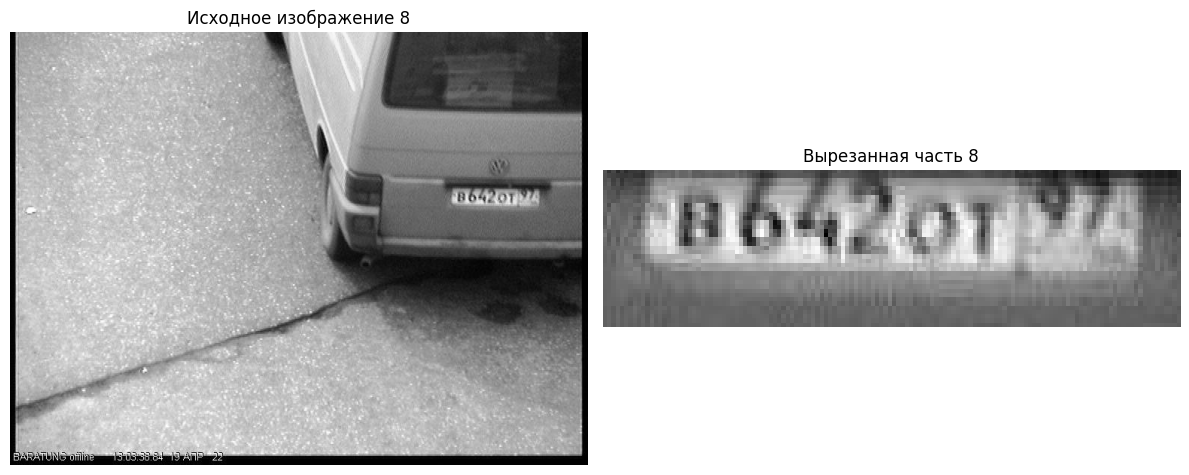

In [47]:
img_count = 8

for i in range(1, img_count + 1):
    path = f"../car_plates_img/car_p_{i}.jpg"
    img = cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    _, th_img = cv.threshold(img, 105, 255, cv.THRESH_BINARY)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    cropped_img = find_plate_2(img, th_img)
    if(cropped_img is None):
        continue

    ax1.imshow(img, cmap="gray")
    ax1.set_title(f'Исходное изображение {i}')
    ax1.axis('off')

    ax2.imshow(cropped_img, cmap="gray")
    ax2.set_title(f'Вырезанная часть {i}')
    ax2.axis('off')

    ax1.set_aspect('equal')
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.show()

